# Tutorial Notebook for UN Datathon Participants 🌐 🔐


This notebook is designed to acquaint participants of the UN datathon with antigranular, which is your private data exploration toolkit, and showcase its main functions!

## What is Antigranular?

With Antigranular, you can use Python to securely explore and gain insights from your data without ever seeing sensitive information. 🕵️‍♂️🔐

Antigranular leverages AWS enclaves, which are isolated and protected environments that run on the cloud. AWS enclaves ensure that your data and code are safe from unauthorised access, even from AWS itself. 🛡️☁️

Antigranular also integrates with powerful differential privacy libraries, such as OpenDP, SmartNoise, and DiffPrivLib. Differential privacy is a technique that adds controlled noise to your data analysis, preserving the privacy of individual records while still allowing you to draw meaningful conclusions. 📊🔇

With Antigranular, you can work with private sensitive datasets conveniently, knowing that your data analysis remains confidential and insightful! 😊👍

## How to Use antigranular?


### Install the Package 📦

First, we need to add antigranular to our local jupyter kernel. You can do this by installing it directly from PyPI, which is like an app store but for python packages!


In [1]:
!pip install antigranular

### Using Antigranular for Secure Computations 🔐

Now that you're connected, your ag.login initiates a secure session with Antigranular where we can work with our data confidentially.

See the the %%ag at the beginning of a cell? It indicates that the code within this cell will be executed securely on the Antigranular platform, ensuring the confidentiality of our computations. Like magic! 😍

In [2]:
import antigranular as ag
session = ag.login(<client_id>,<client_secret>, competition = "UN Datathon PETs Track")

Connected to Antigranular server session id: e3890b5d-4b0b-413d-aa07-cb7130efe5c0, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


🔑 Note: Replace `<client_id>`, `<client_secret>`, with actual values that you will get from antigranular.com to get connected.

🔐 Ensure to substitute `<client_id>` and `<client_secret>` with your respective Antigranular credentials.

## Loading the Data 🚀

For this datathon, we possess an extensive private dataset, which we have divided into 19 separate smaller datasets. This division allows for each dataset to be loaded individually, promoting swifter execution times, so there's nothing holding you back. 💥

The [op_pandas](https://docs.antigranular.com/private-python/packages/pandas) library includes functionality for merging and joining two datasets, enabling the combination of multiple datasets.

You can load two datasets by using `load_dataset` functionality, which returns an `op_pandas.PrivateDataFrame` object.

In [3]:
%%ag
undata_ls = load_dataset("undata_ls")
undata_ls_dif = load_dataset("undata_ls_dif")

## Checking the Privacy Budget 🤑

Privacy-preserving algorithms used by libraries often consume a "privacy budget" to ensure that data privacy is maintained. Here's how you can check your spending:

In [4]:
session.privacy_odometer()

{'total_epsilon_used': 8.999999999999988,
 'total_delta_used': 0.0,
 'library_costs': {'op_pandas': {'total_delta': 0,
   'total_epsilon': 8.999999999999988,
   'total_requests': 13}},
 'dataset_costs': {'undata_ls': {'delta': 0, 'eps': 4.999999999999993},
  'undata_ls_dif': {'delta': 0, 'eps': 3.999999999999995}}}

## Viewing Data 🔍

To protect privacy, records in PrivateDataFrame and PrivateSeries cannot be viewed directly. But that doesn't mean you can't see anything! 👀 You can still analyse and obtain statistical information about the data using methods that offer differential privacy guarantees.


### Viewing Details About the Data

`ag_print` is a function packaged within Antigranular which can be used to print objects from the ag environment.

Here's how you can print the details about the data, like `columns` and `metadata`:

In [5]:
%%ag

ag_print("undata_ls Details: \n")
ag_print("Columns: \n", undata_ls.columns)
ag_print("Metadata: \n", undata_ls.metadata)
ag_print("Dtypes: \n", undata_ls.dtypes)

undata_ls Details: 

Columns: 
 Index(['objectid', 'ls_main', 'ls_num_lastyr', 'ls_num_now', 'ls_num_diff',
       'ls_num_increased', 'ls_num_decreased', 'ls_num_no_change',
       'ls_num_inc_less_sales', 'ls_num_inc_more_birth',
       'ls_num_inc_more_acquired', 'ls_num_inc_received_free',
       'ls_num_dec_poor_health', 'ls_num_dec_death',
       'ls_num_dec_sales_good_price', 'ls_num_dec_sales_distress',
       'ls_num_dec_escape_stolen', 'ls_num_dec_consumed',
       'ls_num_inc_dec_other', 'ls_num_inc_dec_dk', 'ls_num_inc_dec_ref',
       'ls_feed_open_pasture', 'ls_feed_common_pasture',
       'ls_feed_self_produced', 'ls_feed_purchased', 'ls_feed_free_dist',
       'ls_feed_other', 'ls_feed_dk', 'ls_feed_ref'],
      dtype='object')
Metadata: 
 {'objectid': (3496, 239871), 'ls_main': (1.0, 999.0), 'ls_num_lastyr': (0.0, 200000.0), 'ls_num_now': (0.0, 200000.0), 'ls_num_diff': (-99955.0, 18000.0), 'ls_num_increased': (0.0, 1.0), 'ls_num_decreased': (0.0, 1.0), 'ls_num_no_chan

In [6]:
%%ag

ag_print("undata_ls_dif Details: \n")
ag_print("Columns: \n", undata_ls_dif.columns)
ag_print("Metadata: \n", undata_ls_dif.metadata)
ag_print("Dtypes: \n", undata_ls_dif.dtypes)

undata_ls_dif Details: 

Columns: 
 Index(['objectid', 'ls_proddif', 'ls_proddif_feed_purchase',
       'ls_proddif_access_pasture', 'ls_proddif_access_water',
       'ls_proddif_vet_serv', 'ls_proddif_vet_input', 'ls_proddif_diseases',
       'ls_proddif_theft', 'ls_proddif_access_market',
       'ls_proddif_access_credit', 'ls_proddif_access_labour',
       'ls_proddif_other', 'ls_proddif_dk', 'ls_proddif_ref', 'ls_salesmain',
       'ls_salesdif', 'ls_salesdif_marketing_cost',
       'ls_salesdif_damage_losses', 'ls_salesdif_low_demand',
       'ls_salesdif_pay_delay', 'ls_salesdif_low_price',
       'ls_salesdif_slaughterhouse', 'ls_salesdif_processing',
       'ls_salesdif_competition', 'ls_salesdif_other', 'ls_salesdif_dk',
       'ls_salesdif_ref', 'ls_salesprice'],
      dtype='object')
Metadata: 
 {'objectid': (3496, 239871), 'ls_proddif': (0.0, 999.0), 'ls_proddif_feed_purchase': (0.0, 1.0), 'ls_proddif_access_pasture': (0.0, 1.0), 'ls_proddif_access_water': (0.0, 1.0), 'ls_p

`metadata` denotes the bounds of numerical data.

### Quick Statistics 📊

One way to obtain the quick-statistic is by using the `describe()` method. You can spend some epsilon and obtain a rough meta-data about the dataset to give you a quick overview.



In [7]:
%%ag

undata_ls_describe = undata_ls.describe(eps=1)
ag_print("undata_ls Describe:\n", undata_ls_describe)

undata_ls_dif_describe = undata_ls_dif.describe(eps=1)
ag_print("undata_ls Describe:\n", undata_ls_describe)

undata_ls Describe:
             objectid        ls_main  ...     ls_feed_dk    ls_feed_ref
count  105778.000000  105778.000000  ...  105778.000000  105778.000000
mean    92193.209019      14.449454  ...       0.000008       0.000000
std     74658.754923     101.949025  ...       0.116855       0.025243
min      4243.259322       1.401837  ...       0.000000       0.000000
25%     30224.180885       1.778025  ...       0.000960       0.001302
50%     63203.558291       2.695636  ...       0.000832       0.002792
75%    149652.218706       4.534196  ...       0.009727       0.061247
max    238770.933065     397.705265  ...       0.241089       0.887168

[8 rows x 29 columns]

undata_ls Describe:
             objectid        ls_main  ...     ls_feed_dk    ls_feed_ref
count  105778.000000  105778.000000  ...  105778.000000  105778.000000
mean    92193.209019      14.449454  ...       0.000008       0.000000
std     74658.754923     101.949025  ...       0.116855       0.025243
min      42

You can view the statistics by exporting the non-private result to the local Jupyter server using the `export` method:

In [8]:
%%ag

export(undata_ls_describe, name='undata_ls_describe')

Setting up exported variable in local environment: undata_ls_describe


Now, we can access undata_ls_describe in our local jupyter environment.

In [9]:
print(undata_ls_describe)

            objectid        ls_main  ls_num_lastyr     ls_num_now  \
count  105778.000000  105778.000000  105778.000000  105778.000000   
mean    92193.209019      14.449454     203.417707     934.263151   
std     74658.754923     101.949025    7906.386832   16830.384503   
min      4243.259322       1.401837       0.826618       0.180138   
25%     30224.180885       1.778025       3.857679       2.180077   
50%     63203.558291       2.695636       8.946409       5.118635   
75%    149652.218706       4.534196      22.420499      14.948462   
max    238770.933065     397.705265   22107.875827  100927.713730   

         ls_num_diff  ls_num_increased  ls_num_decreased  ls_num_no_change  \
count  105778.000000     105778.000000     105778.000000     105778.000000   
mean     -398.081894          0.253148          0.609232          0.135010   
std      6785.798223          0.449069          0.491129          0.359592   
min    -36402.714492          0.000000          0.000000          

## Data Preprocessing 🌐

### Importing External Data

Guess what? You can also import any external data, merge it with the data provided to get some inferences.

Here is an example on how to do that:

In [10]:
'''
Creating mock data

Mock data will just be 100 rows of age and salary information
'''

import pandas as pd
import numpy as np

n_num = 100
df = pd.DataFrame({'age': np.random.randint(0, 80, n_num), 'salary': np.random.randint(100, 100000, n_num)})
session.private_import(data = df, name= 'imported_df')

dataframe cached to server, loading to kernel...
Output: Dataframe loaded successfully to the kernel



In [11]:
%%ag
# Creating a PrivateDataFrame out of the DataFrame imported.
import op_pandas

metadata = {
    'age': (0, 80),
    'salary': (1, 200000)
}

priv_df = op_pandas.PrivateDataFrame(imported_df ,metadata = metadata)

In [12]:
%%ag

ag_print("Private DataFrame Describe:\n", priv_df.describe(eps=1))

Private DataFrame Describe:
              age        salary
count  81.000000     81.000000
mean   27.011964  75850.691165
std    39.135588  50522.226239
min     0.000000  79757.070666
25%    19.951170  40380.330438
50%    58.082244  62273.711057
75%    60.722265  49439.122435
max    71.488985  75859.159417



Now that `priv_df` is within the ag environment, you can do any operation with the original data and extract inferences.

### Combining Datasets: `undata_ls` and `undata_ls_dif`

To facilitate certain analyses and visualisations, it might be useful to combine our two datasets (`undata_ls` and `undata_ls_dif`) into a single dataset.

This can allow us to explore relationships between features more efficiently. 🤝🏼

In [13]:
%%ag

import op_pandas

joined_data = op_pandas.merge(undata_ls, undata_ls_dif, on="objectid")

ag_print("Joined Data Columns: \n", joined_data.columns)

Joined Data Columns: 
 Index(['objectid', 'ls_main', 'ls_num_lastyr', 'ls_num_now', 'ls_num_diff',
       'ls_num_increased', 'ls_num_decreased', 'ls_num_no_change',
       'ls_num_inc_less_sales', 'ls_num_inc_more_birth',
       'ls_num_inc_more_acquired', 'ls_num_inc_received_free',
       'ls_num_dec_poor_health', 'ls_num_dec_death',
       'ls_num_dec_sales_good_price', 'ls_num_dec_sales_distress',
       'ls_num_dec_escape_stolen', 'ls_num_dec_consumed',
       'ls_num_inc_dec_other', 'ls_num_inc_dec_dk', 'ls_num_inc_dec_ref',
       'ls_feed_open_pasture', 'ls_feed_common_pasture',
       'ls_feed_self_produced', 'ls_feed_purchased', 'ls_feed_free_dist',
       'ls_feed_other', 'ls_feed_dk', 'ls_feed_ref', 'ls_proddif',
       'ls_proddif_feed_purchase', 'ls_proddif_access_pasture',
       'ls_proddif_access_water', 'ls_proddif_vet_serv',
       'ls_proddif_vet_input', 'ls_proddif_diseases', 'ls_proddif_theft',
       'ls_proddif_access_market', 'ls_proddif_access_credit',
      

Using `merge` method, we merge the two PrivateDataFrames.

## Data Visualisation 🤩

The next function in your arsenal is data visualisation. This is a pivotal step in exploratory data analysis. By visualising our data, we can observe patterns, anomalies, and relationships between variables that might not be apparent from the raw data alone.


### Exploring the Data Using `histograms`

We can visualise different columns using differentially private `histograms`.

In [14]:
%%ag

hist_data = joined_data.hist(column='ls_salesprice',eps=1)
export(hist_data , 'hist_data')

Setting up exported variable in local environment: hist_data


To visualise the histogram locally, you can use matplotlib or any other plotting library of your choice.

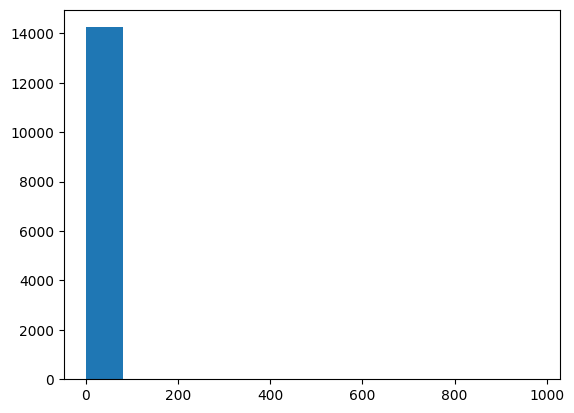

In [15]:
import matplotlib.pyplot as plt
dp_hist, dp_bins = hist_data
# Create a bar plot using Matplotlib
plt.bar(dp_bins[:-1], dp_hist, width=np.diff(dp_bins)*0.8, align='edge')

# Display the plot
plt.show()

### Splitting the Data

You can use `op_pandas.train_test_split` to split the data into `training` and `testing` parts randomly to train any of the models provided in `op_diffprivlib`.

Here is an example on how to remove some columns from the data, and split the rest into `training` and `testing` parts.

In [16]:
%%ag
# removing 'ls_num_dec_poor_health' and 'ls_num_dec_death' from the joined dataset.

joined_data.drop(['ls_num_dec_poor_health', 'ls_num_dec_death'])

train_data, test_data = op_pandas.train_test_split(joined_data)

ag_print("Train Data Description: \n", train_data.describe(eps = 1))
ag_print("Test Data Description: \n", test_data.describe(eps = 1))

Train Data Description: 
             objectid       ls_main  ...  ls_salesdif_ref  ls_salesprice
count   71419.000000  71419.000000  ...     71419.000000   71419.000000
mean    88869.949408      1.000000  ...         0.000890       6.326971
std     72794.745747     94.557145  ...         0.173016      28.723785
min      4304.725306      1.315445  ...         0.000000       1.727385
25%     26193.696083      1.746106  ...         0.029735       1.202585
50%     57818.152632      2.925408  ...         0.017631       2.884223
75%    147928.121780    190.445357  ...         0.006801     614.271848
max    237536.609733    665.827401  ...         0.046305     835.511705

[8 rows x 55 columns]

Test Data Description: 
             objectid       ls_main  ...  ls_salesdif_ref  ls_salesprice
count   23368.000000  23368.000000  ...     23368.000000   23368.000000
mean    74278.048126      7.665492  ...         0.002581       1.000000
std     61174.333564    170.899136  ...         0.097143     

Now you can train any model from `op_diffprivlib`.

Now that we are all done, we can terminate the session. Happy coding! 😎

In [17]:
session.terminate_session()

{'status': 'ok'}